In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate

In [4]:
data_ = pd.read_csv('c:/users/nb-0242/jupyter/PHR/data_.csv')

In [9]:
data_.loc[data_['DE1_dg']==8.0,:] = 0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_, data_['DE1_dg'],test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
#accuracy
np.mean(np.equal(lr_yhat, y_test))*100

100.0

In [44]:
f1_score(y_test, lr_yhat)

1.0

In [45]:
confusion_matrix(y_test, lr_yhat)

array([[9724,    0],
       [   0,  813]], dtype=int64)

In [50]:
print(np.std(X_test, 0)* lr.coef_)

ValueError: Length of passed values is 1, index implies 73

In [63]:
coefs = np.abs(lr.coef_[0])
indices =np.argsort(coefs)[::-1]

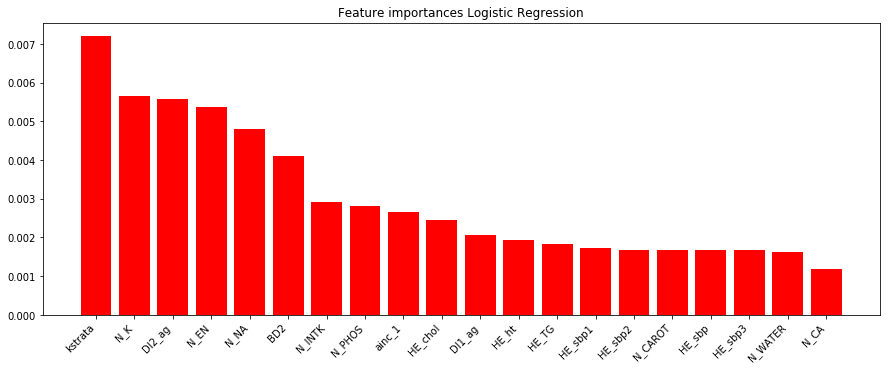

In [71]:
plt.figure(figsize=(15,7))
plt.title("Feature importances Logistic Regression")
plt.bar(range(20), coefs[indices[:20]],
       color="r", align="center")
plt.xticks(range(20), X_test.columns[indices[:20]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)